In [1]:
import pandas as pd
import numpy as np
print(f'Pandas version: {pd.__version__}')

Pandas version: 1.5.3


In [2]:
data = pd.read_csv('https://github.com/armaf002/Food-price/raw/main/preprocessed-data.csv')

In [3]:
print(f'Shape of pre-processed dataset is: {data.shape}')

Shape of pre-processed dataset is: (64221, 18)


In [4]:
data.head(5)

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,NGN,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,NGN,150.18,1.3254,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),1KG,actual,Wholesale,NGN,358.70,3.1656,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,1KG,actual,Wholesale,NGN,155.61,1.3733,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),1KG,actual,Wholesale,NGN,196.87,1.7374,2002,January,Dry Season,12.876579


### Convert date to an actual date value in Pandas

In [5]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

### Dropping unnecessary columns:

- latitude and longitude - Information about location already captured in state column
- category - More focused on predicting commodity prices instead of the category of the commodity. Category is just a grouping of commodities
- pricetype & priceflag - Irrelevant for predicting food prices
- currency - We know the currency anyway (NGN)
- usdprice - Can simply multiple price in NGN with the USD conversion rate, so irrelevant

In [6]:
data.drop(columns=['latitude','longitude','category','priceflag','pricetype','currency','usdprice'],inplace=True)

### Check the distributions for all categorical columns

In [7]:
cat_cols = ['State','Local_Government','Market_Name','commodity','unit','season']

for col in cat_cols:
    print(f'Unique values for column {col} are : {data[col].unique()} \n {"-"*100}')

Unique values for column State are : ['Katsina' 'Sokoto' 'Borno' 'Kano' 'Jigawa' 'Oyo' 'Lagos' 'Kaduna'
 'Zamfara' 'Abia' 'Gombe' 'Kebbi' 'Adamawa' 'Yobe'] 
 ----------------------------------------------------------------------------------------------------
Unique values for column Local_Government are : ['Jibia' 'Gada' "Mai'Adua" 'Mobbar' 'Dawakin Tofa' 'Maigatari'
 'Ibadan North' 'Maiduguri' 'Kosofe' 'Giwa' 'Kaura Namoda' 'Oboma Ngwa'
 'Akko' 'Kaugama' 'Lere' 'Dandume' 'Gwandu' 'Hong' 'Biu' 'Damaturu'
 'Potiskum' 'Konduga' 'Geidam' 'Gujba' 'Jakusko' 'Karasuwa' 'Nguru'
 'Yunusari' 'Yusufari' 'Borsari' 'Gulani'] 
 ----------------------------------------------------------------------------------------------------
Unique values for column Market_Name are : ['Jibia (CBM)' 'Illela (CBM)' 'Mai Adoua (CBM)' 'Damassack (CBM)'
 'Dawanau' 'Mai Gatari (CBM)' 'Ibadan' 'Maiduguri' 'Lagos' 'Giwa'
 'Kaura Namoda' 'Aba' 'Gombe' 'Gujungu' 'Saminaka' 'Dandume' 'Gwandu'
 'Mubi' 'Biu' 'Damaturu' 'Potis

In [8]:
# Remove duplicates
unique_df = data.drop_duplicates(subset=['State', 'Local_Government', 'Market_Name'])

# Get unique combinations
unique_combinations = unique_df[['State', 'Local_Government', 'Market_Name']].values

pd.DataFrame(unique_combinations,columns=['State', 'Local_Government', 'Market_Name']).sort_values(by=['State']).reset_index(drop=True)

,State,Local_Government,Market_Name
0,Abia,Oboma Ngwa,Aba
1,Adamawa,Hong,Mubi
2,Borno,Maiduguri,Custom
3,Borno,Biu,Biu
4,Borno,Konduga,Bullunkutu
5,Borno,Maiduguri,Budum
6,Borno,Konduga,Baga Road
7,Borno,Maiduguri,Kusawam Shanu
8,Borno,Konduga,Abba Gamaram
9,Borno,Maiduguri,Monday


From the above, we see that there is almost a 1 to 1 mapping between Local_Government and Market_Name. So, Market_Name can be dropped since it won't provide much value to the ML model. This will also help reduce dimensionality of our final dataset.

In [9]:
data.drop(columns=['Market_Name'],inplace=True)

In [10]:
data

,date,State,Local_Government,commodity,unit,price,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Maize,1KG,175.92,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Millet,1KG,150.18,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Rice (imported),1KG,358.70,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Sorghum,1KG,155.61,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Beans (niebe),1KG,196.87,2002,January,Dry Season,12.876579
...,...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),1KG,310.00,2023,January,Dry Season,19.160000
64217,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),1KG,298.55,2023,January,Dry Season,19.160000
64218,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),1KG,294.40,2023,January,Dry Season,19.160000
64219,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),1KG,274.82,2023,January,Dry Season,19.160000


In [11]:
# Remove duplicates
unique_df = data.drop_duplicates(subset=['commodity','unit'])

# Get unique combinations
unique_combinations = unique_df[['commodity','unit']].values

pd.DataFrame(unique_combinations,columns=['commodity','unit']).sort_values(by=['commodity']).reset_index(drop=True)

,commodity,unit
0,Bananas,1KG
1,Beans (niebe),1KG
2,Beans (red),1KG
3,Beans (white),1KG
4,Bread,Unit
5,"Cassava meal (gari, yellow)",1KG
6,Cowpeas,1KG
7,Cowpeas (brown),1KG
8,Cowpeas (white),1KG
9,Eggs,30 pcs


In [12]:
data[['commodity','unit']].value_counts().sort_index()

commodity                    unit      
Bananas                      1KG           1166
Beans (niebe)                1KG             20
Beans (red)                  1KG           1216
Beans (white)                1KG           1226
Bread                        Unit          1464
Cassava meal (gari, yellow)  1KG           1772
Cowpeas                      1KG            956
Cowpeas (brown)              1KG           1929
Cowpeas (white)              1KG           2074
Eggs                         30 pcs        1211
Fish                         1KG           1209
Fuel (diesel)                L             1384
Fuel (petrol-gasoline)       L             1371
Gari (white)                 1KG           2019
Groundnuts                   1KG           1232
Groundnuts (shelled)         1KG           2040
Maize                        1KG            561
Maize (white)                1KG           2330
Maize (yellow)               1KG           1977
Maize flour                  1KG           1236


From the above we see that almost all commodities have exactly 1 unit except:
1. Oil (palm) - we will convert the L records into kg by using density of palm oil as 0.89 g/ml
2. Yam & Yam (Abuja) - Can remove records which contain 100 Tubers

In [13]:
data = data.query("unit != '100 Tubers'")

In [14]:
tmp = data.query("commodity == 'Oil (palm)' and unit=='L'")['price'] * 1.123

In [15]:
data.loc[tmp.index, 'price'] = tmp

In [16]:
data

,date,State,Local_Government,commodity,unit,price,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Maize,1KG,175.92,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Millet,1KG,150.18,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Rice (imported),1KG,358.70,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Sorghum,1KG,155.61,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Beans (niebe),1KG,196.87,2002,January,Dry Season,12.876579
...,...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),1KG,310.00,2023,January,Dry Season,19.160000
64217,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),1KG,298.55,2023,January,Dry Season,19.160000
64218,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),1KG,294.40,2023,January,Dry Season,19.160000
64219,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),1KG,274.82,2023,January,Dry Season,19.160000


### Drop unit column

My reasoning behind it is that unit serves as a sort of indicator and almost all commodities have a unique unit. We should use the unit later on after modelling which means that whenever a prediction occurs, it can be said that the prediction represents the corresponding unit of the commodity

In [17]:
data.drop(columns=['unit'],inplace=True)

<ipython-input-17-fd53b1b40b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['unit'],inplace=True)


In [18]:
data

,date,State,Local_Government,commodity,price,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Maize,175.92,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Millet,150.18,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Rice (imported),358.70,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Sorghum,155.61,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Beans (niebe),196.87,2002,January,Dry Season,12.876579
...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),310.00,2023,January,Dry Season,19.160000
64217,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),298.55,2023,January,Dry Season,19.160000
64218,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),294.40,2023,January,Dry Season,19.160000
64219,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),274.82,2023,January,Dry Season,19.160000


In [19]:
# Function to adjust price based on inflation
def adjust_price(row):
    original_price = row['price']
    inflation_rate = row['Inflation']
    adjusted_price = original_price / (1 + (inflation_rate / 100))
    return adjusted_price

# Apply the adjustment function to the DataFrame
data['Adjusted Price'] = data.apply(adjust_price, axis=1)

<ipython-input-19-81913d19b38a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adjusted Price'] = data.apply(adjust_price, axis=1)


In [20]:
data.drop(columns=['Inflation','price','year'],inplace=True)

<ipython-input-20-6ddacc5628dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Inflation','price','year'],inplace=True)


In [21]:
data

,date,State,Local_Government,commodity,month,season,Adjusted Price
0,2002-01-15,Katsina,Jibia,Maize,January,Dry Season,155.851640
1,2002-01-15,Katsina,Jibia,Millet,January,Dry Season,133.047972
2,2002-01-15,Katsina,Jibia,Rice (imported),January,Dry Season,317.780715
3,2002-01-15,Katsina,Jibia,Sorghum,January,Dry Season,137.858536
4,2002-01-15,Katsina,Jibia,Beans (niebe),January,Dry Season,174.411735
...,...,...,...,...,...,...,...
64216,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),January,Dry Season,260.154414
64217,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (brown),January,Dry Season,250.545485
64218,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),January,Dry Season,247.062773
64219,2023-01-15,Zamfara,Kaura Namoda,Cowpeas (white),January,Dry Season,230.631084


### Perform one-hot encoding

In [25]:
cols_to_encode = ['State','Local_Government','month','season']
df_encoded = pd.get_dummies(data, columns=cols_to_encode, dtype='int8')

In [26]:
df_encoded

,date,commodity,Adjusted Price,State_Abia,State_Adamawa,State_Borno,State_Gombe,State_Jigawa,State_Kaduna,State_Kano,...,month_June,month_March,month_May,month_November,month_October,month_September,season_Dry Season,season_Early Rainy Season,season_Late Rainy Season,season_Peak Rainy Season
0,2002-01-15,Maize,155.851640,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2002-01-15,Millet,133.047972,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2002-01-15,Rice (imported),317.780715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2002-01-15,Sorghum,137.858536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2002-01-15,Beans (niebe),174.411735,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,Cowpeas (brown),260.154414,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64217,2023-01-15,Cowpeas (brown),250.545485,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64218,2023-01-15,Cowpeas (white),247.062773,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64219,2023-01-15,Cowpeas (white),230.631084,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.6 MB/s eta 0:00:00


In [29]:
from category_encoders import TargetEncoder

In [32]:
encoder=TargetEncoder()

In [33]:
df_encoded['commodity_encoder']= encoder.fit_transform(df_encoded['commodity'],df_encoded['Adjusted Price'])

In [45]:
df_encoded=df_encoded.drop(["commodity"],axis=1)

In [46]:
df_encoded

,date,Adjusted Price,State_Abia,State_Adamawa,State_Borno,State_Gombe,State_Jigawa,State_Kaduna,State_Kano,State_Katsina,...,month_March,month_May,month_November,month_October,month_September,season_Dry Season,season_Early Rainy Season,season_Late Rainy Season,season_Peak Rainy Season,commodity_encoder
0,2002-01-15,155.851640,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,154.526532
1,2002-01-15,133.047972,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,99.650634
2,2002-01-15,317.780715,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,265.353971
3,2002-01-15,137.858536,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,53.621594
4,2002-01-15,174.411735,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,270.483054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,260.154414,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,270.737953
64217,2023-01-15,250.545485,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,270.737953
64218,2023-01-15,247.062773,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,246.018454
64219,2023-01-15,230.631084,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,246.018454


In [47]:
import matplotlib.pyplot as plt

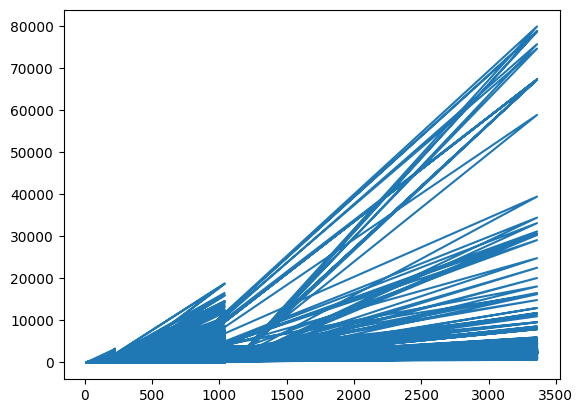

In [51]:
plt.plot(df_encoded["commodity_encoder"],df_encoded["Adjusted Price"])

In [53]:
df_encoded.to_parquet('raj_aryan_final_dataset.parquet')
df_encoded.to_csv('raj_aryan_final_dataset.csv',index=False)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
